### INFO 607: Project 
## Tensorflow project - Gemstone Classification


### Group
- Group member 1
    - Name: Hong Son
    - Email: hts34@drexel.edu
- Group member 2
    - Name: Brian Kong
    - Email: bk555@drexel.edu
- Group member 3
    - Name: Yiyun Zhang
    - Email: yz523@drexel.edu


### Goal
Our area of study is classifying gemstones. A gemstone is mineral, stone, or organic matter that can be cut and polished or used as jewelry or other ornament (Maula & et. al, 2017). We are fascinated by the number of different types of gemstones and the perceived value of gemstones. Some gemstones such as diamond, ruby, sapphire, and emerald carry more value than other gemstones. Thus, they are categorized into various types. The four characteristics used to categorize the type of gemstone based on physical aspects consist of the hardness, density, refraction of light, and the color of the mineral. Our research expands from a previous research done by Syarif Hidayatullah State Islamic University where they worked on image processing problems around three types of gemstone (Ruby, Sapphire, and Emerald). In this study, the researchers used the Artificial Neural Network (ANN) machine learning model and obtained relatively high accuracy for the classification problem. In our study, we will be looking at a larger sample consisting of more gemstones and evaluating the performance of a CNN model.

This project can be useful for the creation of a gemstone identification app. This app would process images to accurately classify the type of stone. Those who have a profession or a hobby for collecting rocks and identifying gemstones would find this app to be very helpful. 


In [ ]:
# mount our google drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Prep Work

In this section, we will begin by going through the files and see how many files and classes there are in the dataset. By going through this, we can then use some of the code for further parts.

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [ ]:
classes = []
num_files = []
for root, dirs, files in os.walk('./gdrive/My Drive/MS Courses/E - Spring 20-21/INFO 607/Project/Dataset/archive'): # replace with drive path
    if len(files) > 0:
      f = os.path.basename(root)
      num_files.append(len(files))

      if f not in classes:
        classes.append(f)

print(len(classes), sum(num_files))

89 3229


### VGG16 Pretrained Model

We will be using the VGG16 convolutional neural network model for image classification and detection. VGG16 is a CNN model, the 16 signifies that it is a 16-layer model: 13 convolutional layers and 3 fully-connected layers.
Pre-trained model by Keras - According to the Keras official website, VGG16 has 0.713 top 1 accuracy and 0.901 top 5 accuracy in ImageNet, which is a dataset of approximate 140 million image data belonging to 1000 classes. 


In [ ]:
# Load the VGG Model in Keras

from keras.applications.vgg16 import VGG16
model = VGG16()

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
# print model summary - we see the model expects images as input with the size 224 x 224 pixels with 3 channels
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Implementing VGG16 Pretrained Model

In this section, we will be implementing the pre-trained VGG16 model on our entire dataset. We will first go through the images and get their classes and convert them into vgg16 image arrays. Then we will use the arrays to predict the images. 

In [ ]:
# a function to get retrieve the images and classes from the filepaths
# resize and convert them to arrays
# and store them into their respected lists

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

def read_images(g_path):
  images = []
  classes = []
  class_n = []

  for root, dirs, files in os.walk(g_path):
    f = os.path.basename(root) # class name - Diamond, Ruby, etc.
    # for fi in files:
    if len(files) > 0:
      if f not in classes:
        classes.append(f)
      # load image from dir
    for fi in files:
      try:
        image = load_img(root+'/'+fi, target_size=(224, 224))              # load the image (VGG) and resize to target size
        image = img_to_array(image)
        images.append(image)
        class_n.append(f)

      except Exception as e:
        print(fi)
        print(e)
  Images = np.array(images)
  return (Images, classes, class_n)

In [ ]:
# look at the shape of the lists
Test_Imgs, Test_Lbls, Test_act = read_images('./gdrive/My Drive/MS Courses/E - Spring 20-21/INFO 607/Project/Dataset/archive/test')
print('Shape of test images: {}'.format(Test_Imgs.shape))

Shape of test images: (363, 224, 224, 3)


In [ ]:
classes = []
num_files = []
for root, dirs, files in os.walk('./gdrive/My Drive/MS Courses/E - Spring 20-21/INFO 607/Project/Dataset/archive/test'):
    if len(files) > 0:
      f = os.path.basename(root) # class name - Diamond, Ruby, etc.
      num_files.append(len(files))

      if f not in classes:
        classes.append(f)
      # for i in files:

print(len(classes), sum(num_files))

87 363


In [ ]:
print(Test_Lbls)

['Aquamarine', 'Almandine', 'Andradite', 'Ametrine', 'Alexandrite', 'Amethyst', 'Andalusite', 'Amazonite', 'Amber', 'Aventurine Green', 'Blue Lace Agate', 'Chalcedony', 'Beryl Golden', 'Cats Eye', 'Benitoite', 'Bixbite', 'Carnelian', 'Bloodstone', 'Aventurine Yellow', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Danburite', 'Diaspore', 'Fluorite', 'Dumortierite', 'Chrysoprase', 'Citrine', 'Emerald', 'Diamond', 'Coral', 'Kyanite', 'Iolite', 'Grossular', 'Hiddenite', 'Kunzite', 'Jade', 'Hessonite', 'Goshenite', 'Jasper', 'Garnet Red', 'Labradorite', 'Lapis Lazuli', 'Onyx Black', 'Onyx Red', 'Moonstone', 'Opal', 'Morganite', 'Malachite', 'Onyx Green', 'Larimar', 'Pearl', 'Peridot', 'Prehnite', 'Rhodochrosite', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Lemon', 'Pyrite', 'Rhodolite', 'Pyrope', 'Quartz Beer', 'Quartz Smoky', 'Rhodonite', 'Ruby', 'Serpentine', 'Sapphire Purple', 'Scapolite', 'Sapphire Blue', 'Spessartite', 'Sapphire Pink', 'Sodalite', 'Sphene', 'Sapph

In [ ]:
print(Test_act)

['Aquamarine', 'Aquamarine', 'Aquamarine', 'Aquamarine', 'Aquamarine', 'Almandine', 'Almandine', 'Almandine', 'Almandine', 'Andradite', 'Andradite', 'Andradite', 'Andradite', 'Ametrine', 'Ametrine', 'Ametrine', 'Ametrine', 'Alexandrite', 'Alexandrite', 'Alexandrite', 'Alexandrite', 'Amethyst', 'Amethyst', 'Amethyst', 'Amethyst', 'Andalusite', 'Andalusite', 'Andalusite', 'Andalusite', 'Amazonite', 'Amazonite', 'Amazonite', 'Amazonite', 'Amber', 'Amber', 'Amber', 'Amber', 'Aventurine Green', 'Aventurine Green', 'Aventurine Green', 'Aventurine Green', 'Aventurine Green', 'Blue Lace Agate', 'Blue Lace Agate', 'Blue Lace Agate', 'Blue Lace Agate', 'Blue Lace Agate', 'Chalcedony', 'Chalcedony', 'Chalcedony', 'Chalcedony', 'Beryl Golden', 'Beryl Golden', 'Beryl Golden', 'Beryl Golden', 'Cats Eye', 'Cats Eye', 'Cats Eye', 'Cats Eye', 'Benitoite', 'Benitoite', 'Benitoite', 'Benitoite', 'Bixbite', 'Bixbite', 'Bixbite', 'Bixbite', 'Carnelian', 'Carnelian', 'Carnelian', 'Carnelian', 'Bloodstone', 

In [ ]:
# get the class names

def get_class_labels(filename):
  for i, x in enumerate(filename):
    for j, k in enumerate(classes):
      if x == k:
        filename[i] ==j
  filename = np.array(filename)
  return filename

In [ ]:
Test_Lbls = get_class_labels(Test_Lbls)
print('Shape of train labels: {}'.format(Test_Lbls.shape))

Shape of train labels: (87,)


In [ ]:
Test_Lbls

array(['Aquamarine', 'Almandine', 'Andradite', 'Ametrine', 'Alexandrite',
       'Amethyst', 'Andalusite', 'Amazonite', 'Amber', 'Aventurine Green',
       'Blue Lace Agate', 'Chalcedony', 'Beryl Golden', 'Cats Eye',
       'Benitoite', 'Bixbite', 'Carnelian', 'Bloodstone',
       'Aventurine Yellow', 'Chalcedony Blue', 'Chrome Diopside',
       'Chrysoberyl', 'Chrysocolla', 'Danburite', 'Diaspore', 'Fluorite',
       'Dumortierite', 'Chrysoprase', 'Citrine', 'Emerald', 'Diamond',
       'Coral', 'Kyanite', 'Iolite', 'Grossular', 'Hiddenite', 'Kunzite',
       'Jade', 'Hessonite', 'Goshenite', 'Jasper', 'Garnet Red',
       'Labradorite', 'Lapis Lazuli', 'Onyx Black', 'Onyx Red',
       'Moonstone', 'Opal', 'Morganite', 'Malachite', 'Onyx Green',
       'Larimar', 'Pearl', 'Peridot', 'Prehnite', 'Rhodochrosite',
       'Quartz Rose', 'Quartz Rutilated', 'Quartz Lemon', 'Pyrite',
       'Rhodolite', 'Pyrope', 'Quartz Beer', 'Quartz Smoky', 'Rhodonite',
       'Ruby', 'Serpentine', 'Sapp

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(Test_Imgs)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
from keras.applications.vgg16 import decode_predictions
from matplotlib.pyplot import figure

# convert the probabilities to class labels
label = decode_predictions(yhat)
# # retrieve the most likely result, e.g. highest probability
new_label = []
for i, l in enumerate(label):
  new_label.append(label[i][0])           
# print the classification
figure(figsize=(2, 2), dpi=80)

# print first 8 predictions along with the actual classes
i=0
for l, x in zip(new_label[0:8], Test_act[0:8]): 
  print('%s (%.2f%%)' % (l[1], l[2]*100))
  print(x)
  print('-----')


40960/35363 [==================================] - 0s 0us/step
screw (20.81%)
Aquamarine
-----
shower_cap (69.94%)
Aquamarine
-----
shower_cap (94.75%)
Aquamarine
-----
packet (28.78%)
Aquamarine
-----
perfume (69.24%)
Aquamarine
-----
switch (28.30%)
Almandine
-----
pencil_sharpener (15.01%)
Almandine
-----
pinwheel (81.35%)
Almandine
-----


<Figure size 160x160 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


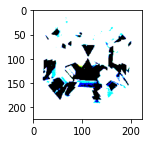

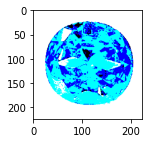

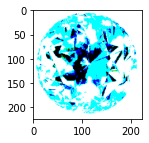

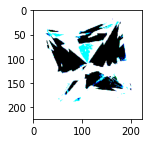

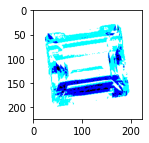

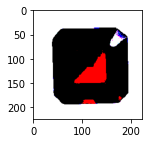

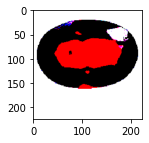

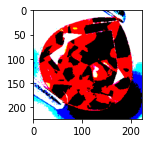

In [ ]:
# plot first 8 images of gemstones
for i in range(0, len(Test_Imgs[0:8])):
  plt.figure(figsize=(2, 2))
  plt.imshow(Test_Imgs[i])

### Results

This section discusses the results of using the VGG16 model. Before discussing the results, we first have to cleanse the labels as they are uppercase and consists of underscores in them.

In [ ]:
# clean up the predictions 
actual_ = []
pred_ = []
for val in Test_act:
  actual_.append(val.lower())

for p in new_label:
  pred_.append(p[1].replace('_', ' ').lower())


In [ ]:
# Create a dataframe with predictions
import pandas as pd

results_df = pd.DataFrame()

results_df['actual'] = actual_
results_df['predict'] = pred_
results_df['confidence'] = [c[2] for c in new_label]

results_df.to_csv('./gdrive/My Drive/MS Courses/E - Spring 20-21/INFO 607/Project/Outputs/VGG16.csv', index=False)

In [ ]:
# evaulate the predictions with metrics - accuracy
from sklearn.metrics import accuracy_score
accuracy_score(actual_, pred_)


0.0

What we found from doing this part is that the VGG16 model is not a great resource for predicting gemstones. We sort of expected this but wanted to try it out and see what it would predict. The results are pretty interesting. We see a range of different predictions but some shows up in different gemstones  such shower cap (39/363), pick (36/363), hair slide(24/363), pencil shapener (21/363), and croquet ball(12). We think this is because the 2-d pixels of the gemstones are closely related to those respected objects. We think that VGG16 would be better for classifying objects related common household items, technologies and animals.